# Computational assigment 3
Kristine Schüller and Sigrid Aunsmo

### 1  Simulate the trajectory up to t = 60 s (1 min) by using three values of the driving force:  0.0, 0.5 and 1.2. Plot the angle θ and angular velocity ω as a function of time in separate panels on top of each other. Limit the possible values of θ between [-π,π], i.e. add or subtract 2π in case it is necessary.

### Task 1:

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy.constants as sc


"""Defining constants and initial values"""
q0=0.5 #default damping parameter
delta_t=0.01 #value for each timestep
theta0 = 0.2 #initial value of the anlge theta
omega0 = 0 #inital value for the pendulums angular velocity 
x0 = np.array([theta0,omega0]) #array of the initial values
g=sc.g #gravitational accelration
l=9.8 #length of pendulum
Omega_d=2/3
Fd=0.5



In [2]:

"""Defining functions"""
#h=skrittlengde

#Runge Kutta 
def Kutta4(f,t0,y0,h,nsteps,Fd,q=1,omega_D=1):
    Y=np.zeros((nsteps,2))  #2D array. Y[:,0] is theta values and Y[:,1] is omega values 
    Y[0]=y0 #initial values 
    T=np.linspace(t0, t0 + h*nsteps, nsteps)
    for i in range(nsteps-1): 
        t=i*h
        F1= f(Y[i],t,q,omega_D,Fd)
        F2= f(Y[i] + h/2* F1,t,q,omega_D,Fd)
        F3= f(Y[i] + h/2* F2,t,q,omega_D,Fd)
        F4= f(Y[i] + h*F3,t,q,omega_D,Fd)
        
        Y[i+1]= Y[i] + h/6*(F1+2*F2+2*F3+F4) #calculating the new theta and omega values
        
    return Y,T #return array of theta and omega values, and time list



def f_forced(w,t,q,omega_D,Fd):
    return np.array([w[1],-q*w[1]-g/l*w[0]+Fd*np.sin(omega_D*t)])

#Function to be used in Runge Kutta
#takes in array of theta and the derivative of theta
#returns array of the derivative of theta and the double derivative of theta

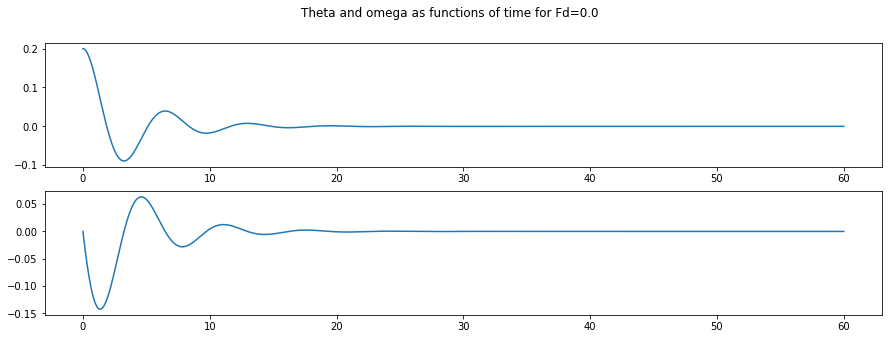

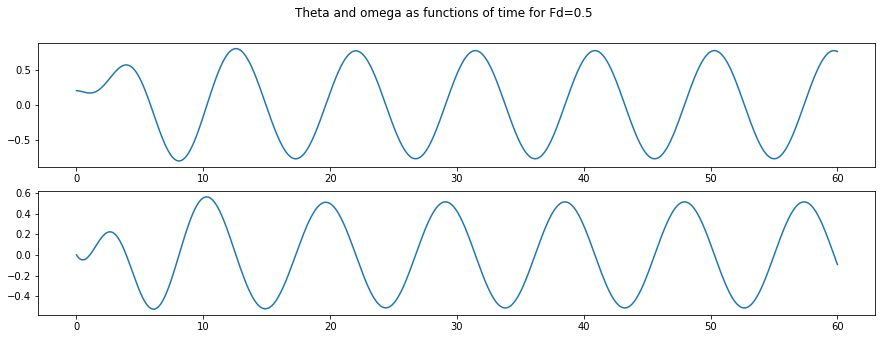

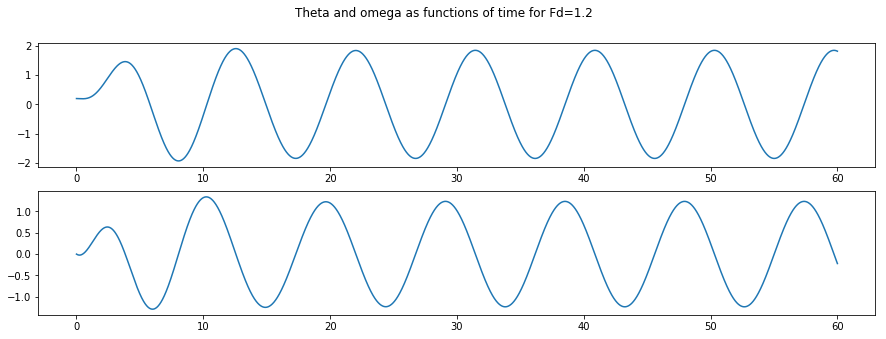

In [3]:
Fd_list=np.array([0.0,0.5,1.2]) #values for Fd
t_max=60
nsteps=int(t_max/delta_t) #number of timesteps
y0=np.array([theta0,omega0]) #array of initial values

for i in range(len(Fd_list)):
    X,T=Kutta4(f_forced,0,y0,delta_t,nsteps,Fd_list[i],q0,Omega_d)
    theta=X[:,0]
    omega=X[:,1]
    
    #plotting, 2 subplots with common x-axis
    fig, axs=plt.subplots(2,1,sharex=True,figsize=(15,5))
    plt.subplot(2,1,1)
    #title for both plots:
    plt.suptitle("Theta and omega as functions of time for Fd="+str(Fd_list[i]))
    plt.plot(T, theta)
    #plt.legend()
    
    plt.subplot(2,1,2)
    plt.plot(T,omega)
    plt.show()
    

### Task 2

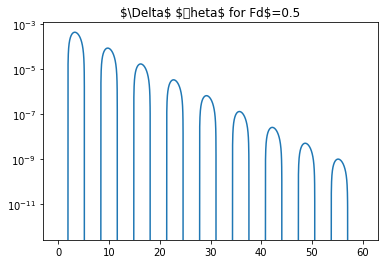

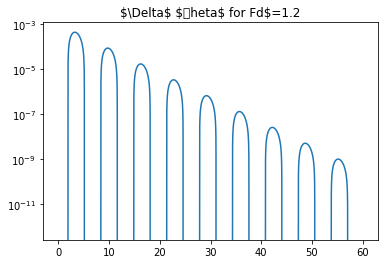

In [17]:
Fds=[0.5,1.2] #values of Fd
y0disp=np.array([theta0+0.001,omega0]) #displacing the initial angle

for i in range(2):
    X,T=Kutta4(f_forced,0,y0,delta_t,nsteps,Fds[i],q0,Omega_d)
    Xdisp,Tdisp=Kutta4(f_forced,0,y0disp,delta_t,nsteps,Fds[i],q0,Omega_d)
    D_theta=X[:,0]-Xdisp[:,0] #difference between 
    
    """
    #test:
    plt.plot(T,Xdisp[:,0])
    plt.show()
    plt.plot(T,X[:,0])
    plt.show()
    #test slutt
    """
    #!!HER BURDE VI KANSKJE finne LINJE LANGS TOPPUNKTENE OG FINNE LYAPUNOV EXPONENT??
    plt.title("$\Delta$ $\theta$ for Fd$="+str(Fds[i]))
    plt.yscale("log") #for semilogarithmic plot
    plt.plot(T,D_theta)
    plt.show()

    

### Task 3

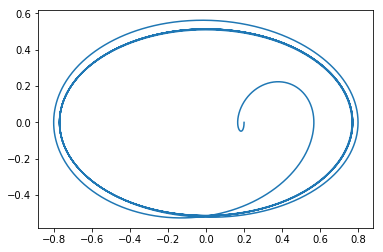

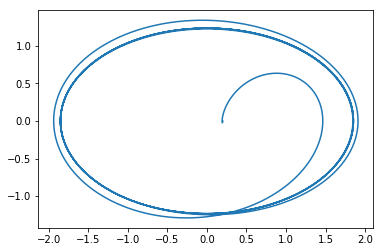

In [18]:
Fds=[0.5,1.2]
t_max3=100
nsteps3=int(t_max/delta_t)

"skal vi plotte for displaced theta eller ikke her? usikker... "

for i in range(2):
    X,T=Kutta4(f_forced,0,y0,delta_t,nsteps3,Fds[i],q0,Omega_d)
    theta=X[:,0]
    omega=X[:,1]
    
    #phase space plot
    plt.plot(theta,omega)
    plt.show()
    


    